<a href="https://colab.research.google.com/github/sidchaubey/Confluent-Kafka-Prepration/blob/main/2.%20CLI%20Commands%20Kafka%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl ipecho.net/plain

34.86.214.119

In [ ]:
# -*- coding: utf-8 -*-
"""PysparkSetupOnColab.ipynb
Automatically generated by Colaboratory.
Original file is located at
    https://colab.research.google.com/drive/1OdAJnwY2fND7xPXJ8x7DlsFqaFgFB_88
"""

!pwd
!ls
!python --version

#!wget https://mirrors.estointernet.in/apache/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz
!wget https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz
!tar -xvzf spark-3.0.0-bin-hadoop2.7.tgz
!pip install findspark

import os
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop2.7"
import findspark
findspark.init()



In [ ]:
!curl -sSOL https://packages.confluent.io/archive/7.0/confluent-7.0.0.tar.gz
!tar -xvf /content/confluent-7.0.0.tar.gz

In [ ]:
!curl -sSOL http://client.hub.confluent.io/confluent-hub-client-latest.tar.gz
!tar -xvf /content/confluent-hub-client-latest.tar.gz

In [5]:
!ls -al /content/confluent-7.0.0


total 36
drwxr-xr-x  8 1000 1000 4096 Oct 21 03:40 .
drwxr-xr-x  1 root root 4096 Nov  8 02:26 ..
drwxr-xr-x  3 1000 1000 4096 Oct 21 02:15 bin
drwxr-xr-x 18 1000 1000 4096 Oct 21 02:15 etc
drwxr-xr-x  3 1000 1000 4096 Oct 21 02:11 lib
drwxr-xr-x  3 1000 1000 4096 Oct 21 02:15 libexec
-rw-r--r--  1 1000 1000  871 Oct 21 03:40 README
drwxr-xr-x  8 1000 1000 4096 Oct 21 02:15 share
drwxr-xr-x  2 1000 1000 4096 Oct 21 03:40 src


In [6]:
%%shell
export PATH=$PATH:/content/bin
which confluent-hub
confluent-hub

/content/bin/confluent-hub
usage: confluent-hub <command> [ <args> ]

Commands are:
    help      Display help information
    install   install a component from either Confluent Hub or from a local file

See 'confluent-hub help <command>' for more information on a specific command.


In [7]:
%%shell
export CONFLUENT_HOME=/content/confluent-7.0.0
export PATH=$PATH:/content/confluent-7.0.0/bin
confluent --help
confluent local services start

Manage your Confluent Platform.

Usage:
  confluent [command]

Available Commands:
  audit-log       Manage audit log configuration.
  cluster         Retrieve metadata about Confluent Platform clusters.
  completion      Print shell completion code.
  config          Modify the CLI configuration.
  connect         Manage Connect.
  help            Help about any command
  iam             Manage RBAC, ACL and IAM permissions.
  kafka           Manage Apache Kafka.
  ksql            Manage ksqlDB applications.
  local           Manage a local Confluent Platform development environment.
  login           Log in to Confluent Platform (required for RBAC).
  logout          Log out of Confluent Platform.
  schema-registry Manage Schema Registry.
  secret          Manage secrets for Confluent Platform.
  version         Show version of the Confluent CLI.

Flags:
  -h, --help            Show help for this command.
  -v, --verbose count   Increase verbosity (-v for warn, -vv for info, -vvv for

In [8]:
# List all system made kafka topics

!/content/confluent-7.0.0/bin/kafka-topics --list --bootstrap-server localhost:9092

__consumer_offsets
__transaction_state
_confluent-command
_confluent-controlcenter-7-0-0-1-AlertHistoryStore-changelog
_confluent-controlcenter-7-0-0-1-AlertHistoryStore-repartition
_confluent-controlcenter-7-0-0-1-Group-ONE_MINUTE-changelog
_confluent-controlcenter-7-0-0-1-Group-ONE_MINUTE-repartition
_confluent-controlcenter-7-0-0-1-Group-THREE_HOURS-changelog
_confluent-controlcenter-7-0-0-1-Group-THREE_HOURS-repartition
_confluent-controlcenter-7-0-0-1-KSTREAM-OUTEROTHER-0000000106-store-changelog
_confluent-controlcenter-7-0-0-1-KSTREAM-OUTEROTHER-0000000106-store-repartition
_confluent-controlcenter-7-0-0-1-KSTREAM-OUTERTHIS-0000000105-store-changelog
_confluent-controlcenter-7-0-0-1-KSTREAM-OUTERTHIS-0000000105-store-repartition
_confluent-controlcenter-7-0-0-1-MetricsAggregateStore-changelog
_confluent-controlcenter-7-0-0-1-MetricsAggregateStore-repartition
_confluent-controlcenter-7-0-0-1-MonitoringMessageAggregatorWindows-ONE_MINUTE-changelog
_confluent-controlcenter-7-0-0-1-

In [9]:
!pip install pyngrok
from pyngrok import ngrok
ngrok_tunnel = ngrok.connect(9021)
print('Public URL:', ngrok_tunnel.public_url)

Public URL: http://ee99-34-86-214-119.ngrok.io


<b>Note:</b>
<p>The above python code provides a way to access the confluent ui running on localhost:9021 for administrator purposes. Since colab notebook run on VM at backend so its not possible to directly access localhost:9021 therefore we have written above code to access that url.</p>

#### Kafka CLI Imp commands:

1. To list the topics : 

```
kafka-topics --list --bootstrap-server localhost:9092
```

2. To create a new topic :     



```
kafka-topics --create --topic 'topic-name' --replication-factor number --partitions number --bootstrap-server localhost:9092
```
```
kafka-topics --create --topic 'my-first-topic' --partitions 1 --replication-factor 1 --bootstrap-server localhost:9092
```

3. To create a producer that puts data inside topic:  

```
kafka-console-producer --topic topic_name --bootstrap-server localhost:9092
```

```
kafka-console-producer --topic 'my-first-topic' --bootstrap-server localhost:9092
```

4. To create a consumer that consumes data from the topic:     

```
kafka-console-consumer --topic topic_name --bootstrap-server localhost:9092
```

```
kafka-console-consumer --topic 'my-first-topic' --bootstrap-server localhost:9092
```

* This will only return logs that are generated at latest in case if we wish to get previously generated messages we'll have to use --from-beginning 


```
kafka-console-consumer --topic 'my-first-topic' --from-beginning --bootstrap-server localhost:9092
```

In [11]:
# CLI Command used to create a new topic:

!/content/confluent-7.0.0/bin/kafka-topics --create --topic 'my-first-topic' --replication-factor 1 --partitions 1 --bootstrap-server localhost:9092

Created topic my-first-topic.


In [12]:
#  CLI Command used to list all the kafka topics

!/content/confluent-7.0.0/bin/kafka-topics --list --bootstrap-server localhost:9092

__consumer_offsets
__transaction_state
_confluent-command
_confluent-controlcenter-7-0-0-1-AlertHistoryStore-changelog
_confluent-controlcenter-7-0-0-1-AlertHistoryStore-repartition
_confluent-controlcenter-7-0-0-1-Group-ONE_MINUTE-changelog
_confluent-controlcenter-7-0-0-1-Group-ONE_MINUTE-repartition
_confluent-controlcenter-7-0-0-1-Group-THREE_HOURS-changelog
_confluent-controlcenter-7-0-0-1-Group-THREE_HOURS-repartition
_confluent-controlcenter-7-0-0-1-KSTREAM-OUTEROTHER-0000000106-store-changelog
_confluent-controlcenter-7-0-0-1-KSTREAM-OUTEROTHER-0000000106-store-repartition
_confluent-controlcenter-7-0-0-1-KSTREAM-OUTERTHIS-0000000105-store-changelog
_confluent-controlcenter-7-0-0-1-KSTREAM-OUTERTHIS-0000000105-store-repartition
_confluent-controlcenter-7-0-0-1-MetricsAggregateStore-changelog
_confluent-controlcenter-7-0-0-1-MetricsAggregateStore-repartition
_confluent-controlcenter-7-0-0-1-MonitoringMessageAggregatorWindows-ONE_MINUTE-changelog
_confluent-controlcenter-7-0-0-1-

In [13]:
# CLI command to create a producer that produces data into a kafka-topic that was created above:

!/content/confluent-7.0.0/bin/kafka-console-producer --topic 'my-first-topic' --bootstrap-server localhost:9092

>hello
>Siddharth on this side
>how are you
>It's been so long that I haven't seen you
>Hope everything is fine 
>Let's see if the message are sent properly or not
>By creating a consumer that retrieves this messages from kafka topic
>Have you seen the UI of data being produced or not.
>

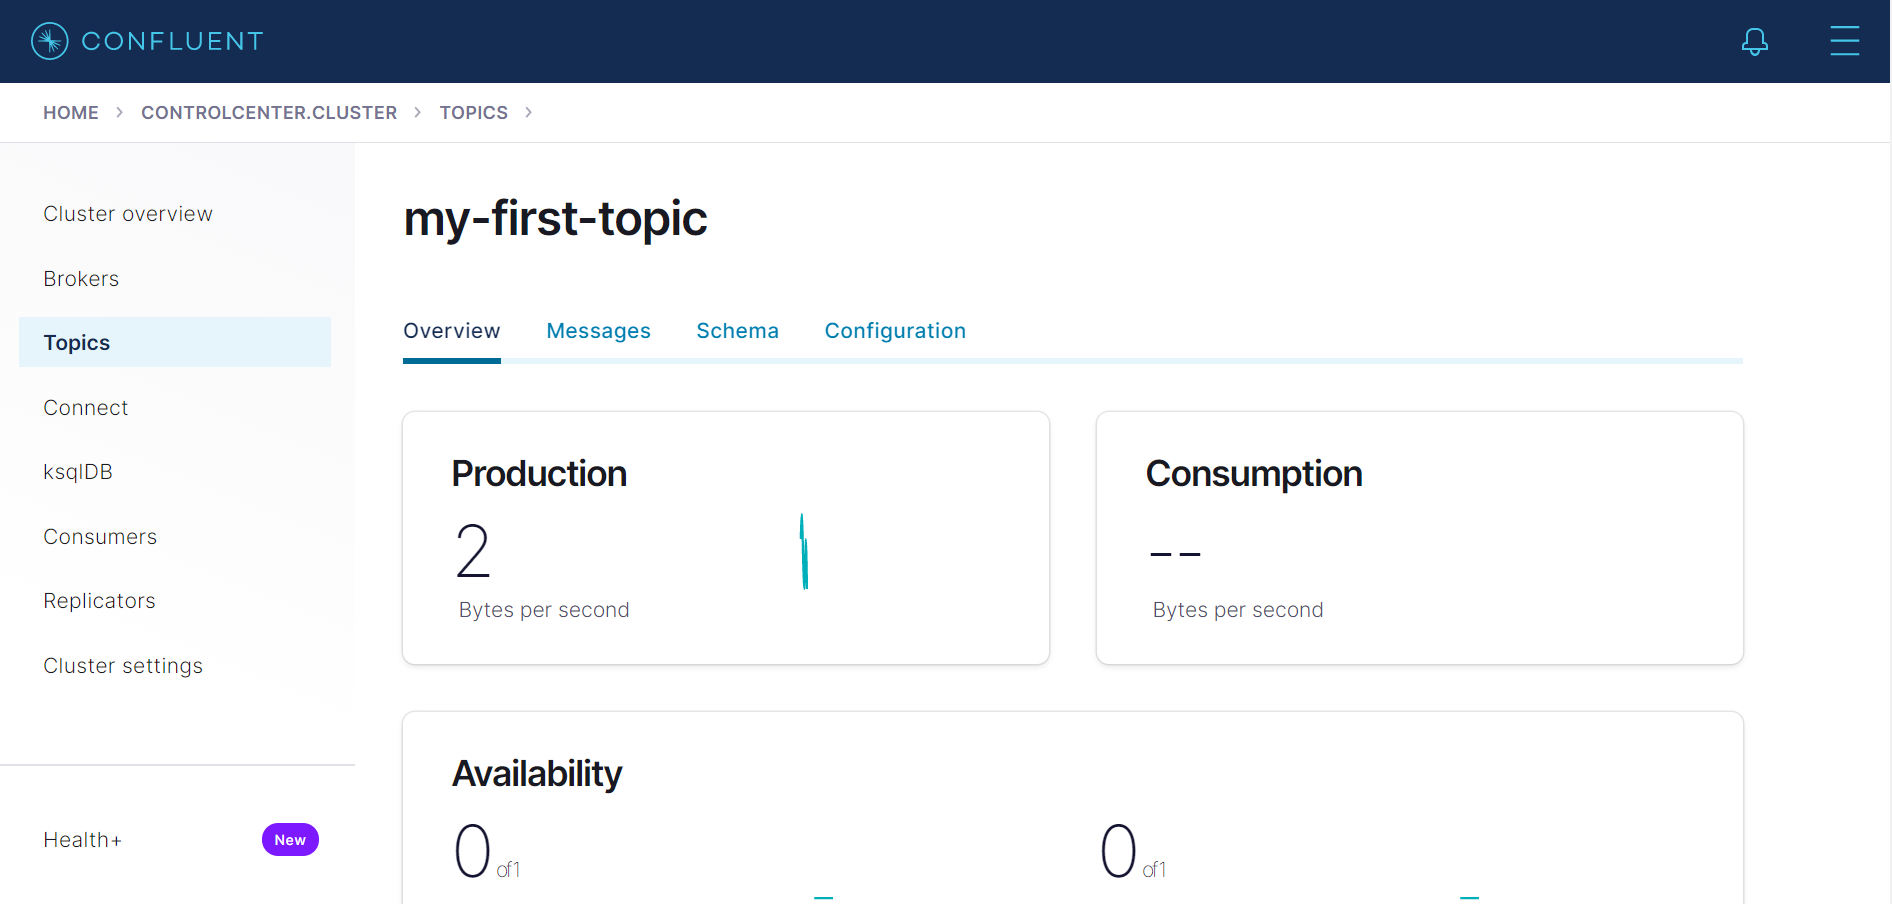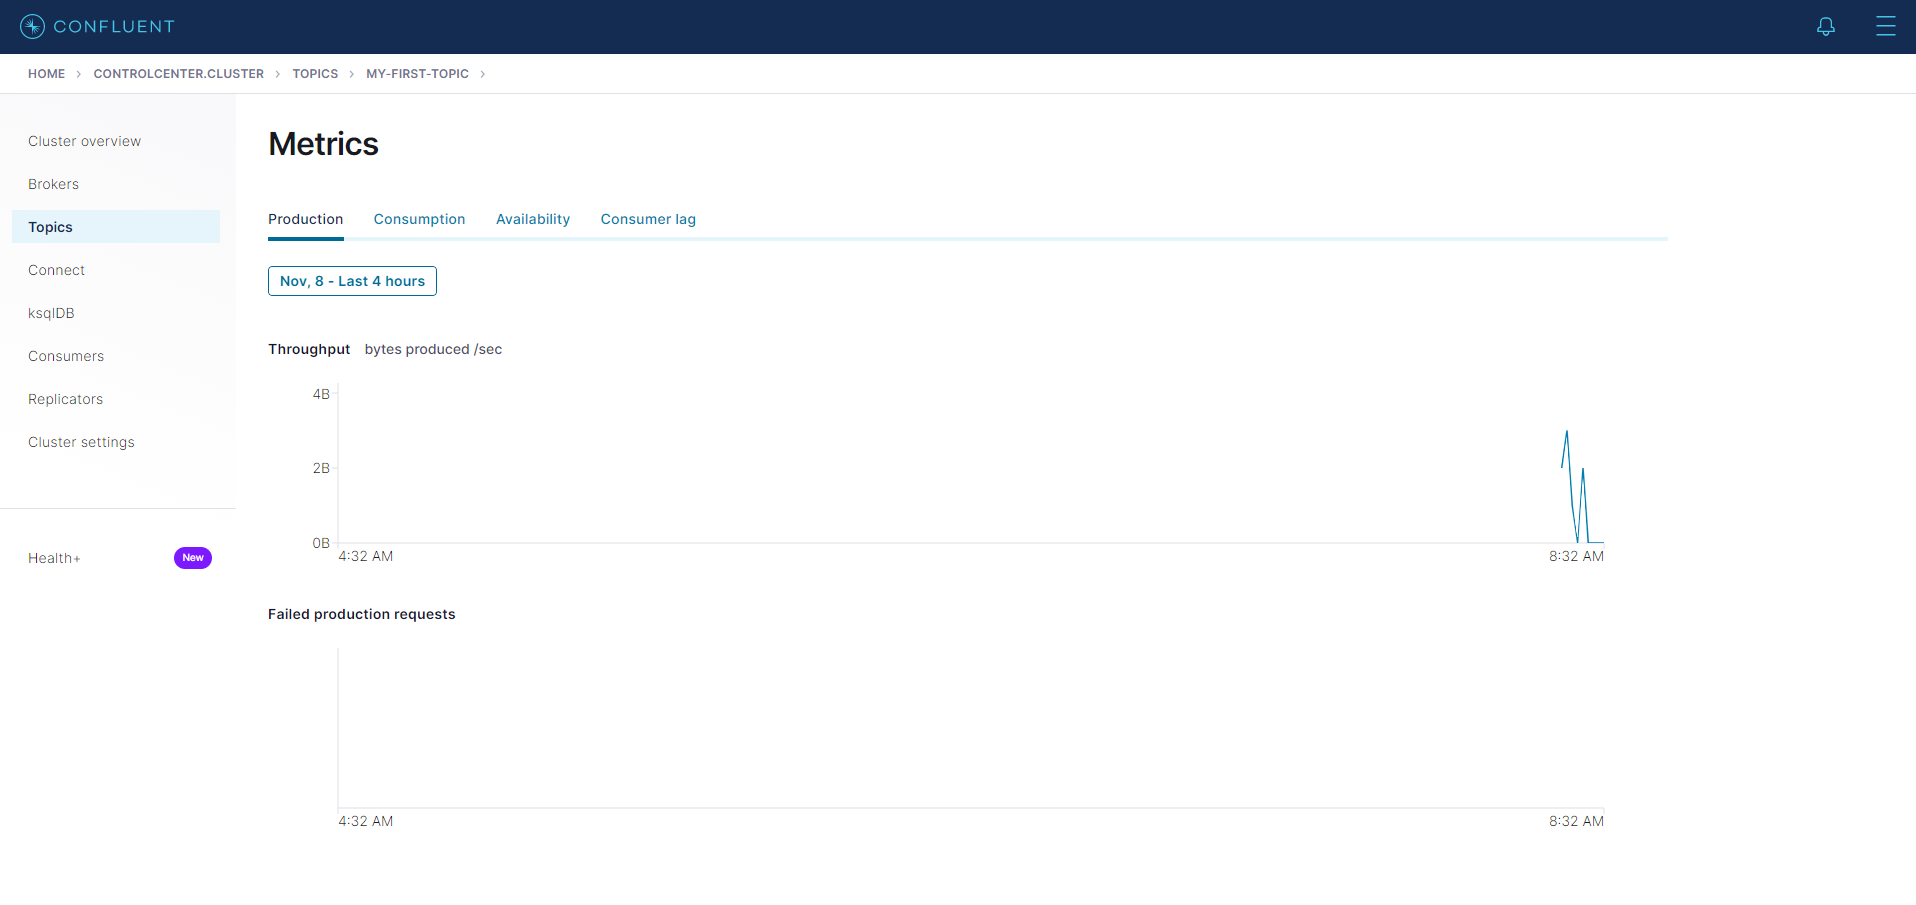

In [15]:
# CLI command to create a consumer that consumes data from a kafka-topic that was created above:

!/content/confluent-7.0.0/bin/kafka-console-consumer --topic 'my-first-topic' --bootstrap-server localhost:9092

# The above CLI command will only show messages that were produced just now.
# As we did not produce any message just now we'll get 0 messages

Processed a total of 0 messages


In [16]:
# Incase if we wish to see previous data as well we will have to supply additional parameter.
# In this case it is --from-beginning 

!/content/confluent-7.0.0/bin/kafka-console-consumer --topic 'my-first-topic' --from-beginning --bootstrap-server localhost:9092


# After running above statement we will see all the history of messages that were sent to topic too



hello
Siddharth on this side
how are you
It's been so long that I haven't seen you
Hope everything is fine 
Let's see if the message are sent properly or not
By creating a consumer that retrieves this messages from kafka topic
Have you seen the UI of data being produced or not.
Processed a total of 8 messages
